Import data

In [1]:
import pandas as pd
df = pd.read_csv('data/employee_churn_data.csv')
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


Enumerate categorical features and scale data

In [2]:
df['salary_enum'] = 0
df.loc[df['salary'] == 'low', 'salary_enum'] = 0
df.loc[df['salary'] == 'medium', 'salary_enum'] = .5
df.loc[df['salary'] == 'high', 'salary_enum'] = 1
df.drop(columns='salary', inplace=True)
df.head()

,department,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,left,salary_enum
0,operations,0,0.577569,3,5.0,0.626759,0,180.866070,no,0.0
1,operations,0,0.751900,3,6.0,0.443679,0,182.708149,no,0.5
2,support,0,0.722548,3,6.0,0.446823,0,184.416084,no,0.5
3,logistics,0,0.675158,4,8.0,0.440139,0,188.707545,no,1.0
4,sales,0,0.676203,3,5.0,0.577607,1,179.821083,no,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})


# Create the standard X and y variables from the dataframe
X = df.drop(columns='left')
X = pd.get_dummies(X)
y = df['left']

test_sizes = np.arange(.1, .4, .02)
train_score = []; set_score = []
for test_size in test_sizes:
    # Create the training and test sets
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=test_size, random_state = 123)

    # Instantiate dt
    rf = RandomForestClassifier(
        n_estimators=200,
        random_state=123
    )
    y_pred_test = rf.fit(X_train, y_train).predict(X_test)

    # Evaluate accuracy
    train_score.append(accuracy_score(y_pred_test, y_test))

figure, axes = plt.subplots(figsize = (18,6))
plt.plot(test_sizes, train_score)
plt.show()

Identify the training set size

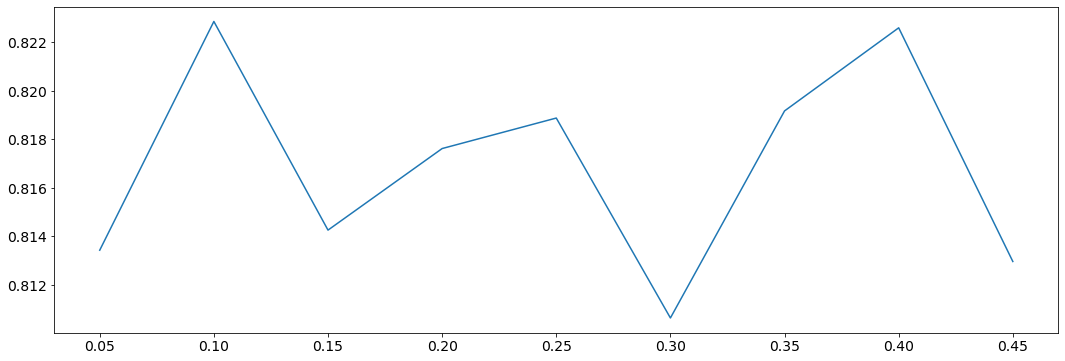

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})


# Create the standard X and y variables from the dataframe
X = df.drop(columns='left')
X = pd.get_dummies(X)
y = df['left']

test_sizes = np.arange(.05, .5, .05)
train_score = []; set_score = []
for test_size in test_sizes:
    # Create the training and test sets
    X_train, X_test, y_train, y_test= train_test_split(
        X, 
        y, 
        test_size=test_size, 
        random_state = 123
    )

    # Instantiate dt
    y_pred_test = DecisionTreeClassifier(
        random_state=123
    ).fit(X_train, y_train).predict(X_test)

    # Evaluate accuracy
    train_score.append(
        accuracy_score(y_pred_test, y_test)
    )

figure, axes = plt.subplots(figsize = (18,6))
plt.plot(test_sizes, train_score)
plt.title('Accuracy Impact on Sample Size')
plt.show()

Baseline RandomForest Model

In [66]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# Create the standard X and y variables from the dataframe
X = df.drop(columns='left')
X = pd.get_dummies(X)
y = df['left']


# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.10, random_state = 123)

# Instantiate dt
rf = RandomForestClassifier()

parameters = {
    'n_estimators': np.arange(50, 400, 50)
}
rf_best = GridSearchCV(rf, parameters).fit(X_train, y_train)


# Predict test set labels
y_pred = rf_best.predict(X_test)

# Evaluate accuracy
acc_test = accuracy_score(y_pred, y_test)
print('Test set accuracy of Baseline RandomForest: {:.4f}'.format(acc_test)) 


Test set accuracy of Baseline RandomForest: 0.8658


Use **AdaBoost** to better fit the **RandomForest**

In [67]:
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate ada
ada = AdaBoostClassifier(
    base_estimator=rf_best.best_estimator_,
    random_state=123
).fit(X_train, y_train)

# Predict test set labels
y_pred = ada.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_pred, y_test)
print('Test set accuracy of AdaBoost on RandomForest: {:.4f}'.format(acc_test)) 

Test set accuracy of AdaBoost on RandomForest: 0.8658


Try using a **BaggingClassifier** to improve the optimized **DecisonTree** with **AdaBoost**

In [68]:
from sklearn.ensemble import BaggingClassifier

# Instantiate bc
bc = BaggingClassifier(
    base_estimator=ada, 
    random_state=1,
    verbose=1,
    n_jobs = -1
).fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_pred, y_test)
print('Test set accuracy of BaggingClassifier of AdaBoost of RandomForest: {:.4f}'.format(acc_test)) 

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   14.7s remaining:   14.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   15.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.8s remaining:    1.8s


Test set accuracy of BaggingClassifier of AdaBoost of RandomForest: 0.8753


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    2.4s finished


Feature Analysis

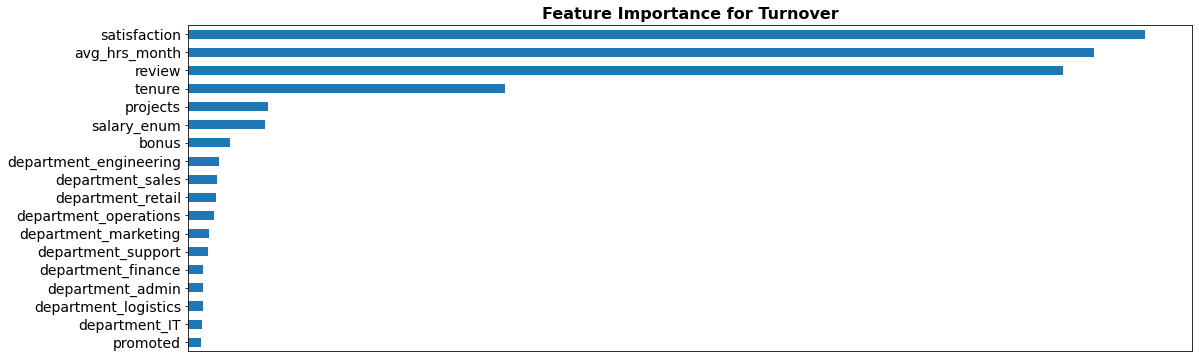

In [61]:
import numpy as np
import matplotlib.pyplot as plt

importances = ada.feature_importances_  
feature_dict = {
    'features': np.array(X.columns),
    'ada': importances
}
ada_df = pd.DataFrame.from_dict(feature_dict) 
ada_df.set_index('features', inplace = True)
ada_df.sort_values('ada', inplace = True, ascending = True)
ada_df.plot(kind = 'barh', figsize = (18,6), fontsize = 14)
plt.title('Feature Importance for Turnover', fontsize = 16, fontweight = 'bold')
plt.legend().remove()
plt.ylabel('')
ax = plt.gca()
ax.get_xaxis().set_visible(False)

There are three significant features.  Lets re-run the ML model with just these three features to see if there's an improvement.

In [65]:
X_feature_reduction = df[['satisfaction','avg_hrs_month','review']]
y_feature_reduction = df['left']


# Create the training and test sets
[X_train_feature_reduction, 
X_test_feature_reduction, 
y_train_feature_reduction, 
y_test_feature_reduction] = train_test_split(X_feature_reduction, y_feature_reduction, test_size=.10, random_state = 123)

# Instantiate dt
rf_feature_reduction = RandomForestClassifier(
    random_state=123
).fit(X_train_feature_reduction, y_train_feature_reduction)

# Predict test set labels
y_pred_feature_reduction = rf_feature_reduction.predict(X_test_feature_reduction)

# Evaluate accuracy
acc_test_feature_reduction = accuracy_score(y_pred_feature_reduction, y_test_feature_reduction)
print('Test set accuracy of Baseline RandomForest: {:.4f}'.format(acc_test_feature_reduction)) 

# Instantiate ada
ada_feature_reduction = AdaBoostClassifier(
    base_estimator=rf_feature_reduction,
    random_state=123
).fit(X_train_feature_reduction, y_train_feature_reduction)

# Predict test set labels
y_pred_feature_reduction = ada_feature_reduction.predict(X_test_feature_reduction)

# Evaluate acc_test
acc_test_feature_reduction = accuracy_score(y_pred_feature_reduction, y_test_feature_reduction)
print('Test set accuracy of AdaBoost on RandomForest: {:.4f}'.format(acc_test_feature_reduction)) 

# Instantiate bc
bc_feature_reduction = BaggingClassifier(
    base_estimator=ada_feature_reduction, 
    n_estimators=20
).fit(X_train_feature_reduction, y_train_feature_reduction)

# Predict test set labels
y_pred_feature_reduction = bc_feature_reduction.predict(X_test_feature_reduction)

# Evaluate acc_test
acc_test_feature_reduction = accuracy_score(y_pred_feature_reduction, y_test_feature_reduction)
print('Test set accuracy of BaggingClassifier of AdaBoost of RandomForest: {:.4f}'.format(acc_test_feature_reduction)) 

Test set accuracy of Baseline RandomForest: 0.8606
Test set accuracy of AdaBoost on RandomForest: 0.8648
Test set accuracy of BaggingClassifier of AdaBoost of RandomForest: 0.8679


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    4.3s remaining:    4.3s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    4.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    3.1s remaining:    3.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    3.1s remaining:    3.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    2.9s remaining:    2.9s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Don

Text(0.5, 1.0, 'Impact on Retention by Modifying Monthly Hours')

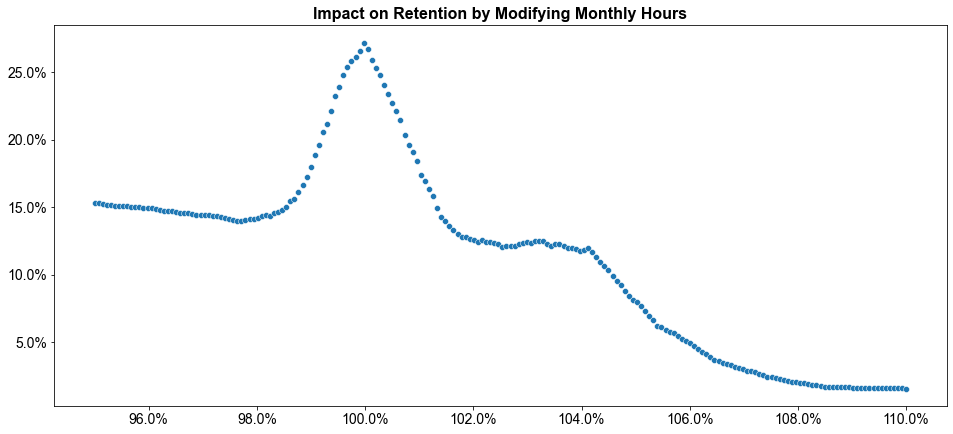

In [70]:
import seaborn as sns
turnover = []
hrs_mod = np.linspace(.95, 1.1, 200)
for idx in hrs_mod:
    mod_hours = X.copy()
    mod_hours.loc[mod_hours.tenure < 9, 'avg_hrs_month'] = mod_hours.loc[mod_hours.tenure < 9, 'avg_hrs_month'] * idx
    mod_hours['left'] = bc.predict(mod_hours)
    mod_hours['turnover'] = 0
    mod_hours.loc[mod_hours.left == 'yes', 'turnover'] = 1
    turnover.append(mod_hours['turnover'].mean())


fig, ax = plt.subplots()
sns.set(
    font_scale=1.4
)
fig.set_size_inches([16,7])
ax = sns.scatterplot(
    y = turnover,
    x = hrs_mod,
)
ax.set_xticklabels(['{:,.1f}'.format(x) + '%' for x in ax.get_xticks()*100])
ax.set_yticklabels(['{:,.1f}'.format(y) + '%' for y in ax.get_yticks()*100])

ax.set_title(
    "Impact on Retention by Modifying Monthly Hours",
    fontsize = 16, 
    fontweight = 'bold'
)